In [ ]:
# Run this cell once when starting on notebook.
# On Google Colab, wait for the Google Drive permission prompts before proceeding
import matplotlib.pyplot as plt
%matplotlib inline
import os
import sys
try:
    %load_ext jupyter_ai_magics
except:
    print("%%ai cells will not work in this notebook")
    print("Please use Gemini for AI queries instead")
from datascience import *
import numpy as np
import math

DATA_FOLDER="data/"
try:
  from google.colab import drive
  drive.mount('/content/drive', force_remount=True)
  !mkdir -p /content/data
  !gdown --folder https://drive.google.com/drive/folders/1XifjqyxFHvjK6nOUi4doYsG12hGPhOcI?usp=drive_link -O /content/data
  DATA_FOLDER = DATA_FOLDER.replace("data/", "/content/data/")
  !ls -l /content/data
except:
  print("Google Drive not mounted; this is normal on Jupyter Hub")


%%ai cells will not work in this notebook
Please use Gemini for AI queries instead
Mounted at /content/drive
Retrieving folder contents
Processing file 1hOMU36QJH-8E1xMqZqick7tdYPtRqXWc codes.csv
Processing file 1Cl56p5ygZPsG_TdGagMpd2wxMAnsNUN0 ucsb-f25-courses.csv
Processing file 1A6TJBGq7Fg5eO_4XrHgrRRM27RRxB6w7 ucsb-m25-courses.csv
Processing file 1KqFgPgttI11ADhBdGWipQ4RaCyM7S8iZ ucsb-s25-courses.csv
Retrieving folder contents completed
Building directory structure
Building directory structure completed
Downloading...
From: https://drive.google.com/uc?id=1hOMU36QJH-8E1xMqZqick7tdYPtRqXWc
To: /content/data/codes.csv
100% 6.40k/6.40k [00:00<00:00, 19.2MB/s]
Downloading...
From: https://drive.google.com/uc?id=1Cl56p5ygZPsG_TdGagMpd2wxMAnsNUN0
To: /content/data/ucsb-f25-courses.csv
100% 333k/333k [00:00<00:00, 116MB/s]
Downloading...
From: https://drive.google.com/uc?id=1A6TJBGq7Fg5eO_4XrHgrRRM27RRxB6w7
To: /content/data/ucsb-m25-courses.csv
100% 136k/136k [00:00<00:00, 72.1MB/s]
Down

# Lecture 11a, CMPSC 5A, S25

Tue 05/06/2025, Week 6


# Midterm Project

We'll first go over the midterm project.

This is the document we'll review:

* [General Instructions, CS5A S25 Midterm](https://docs.google.com/document/d/1gYMuXukOTtJkEthxUeHmWuA1Qn9BtIYkSJa37Gb524E/edit?usp=sharing)




## ic17, ic18 Participation Assignments

There are two participation assignments today
* ic17 is [here on Canvas](https://ucsb.instructure.com/courses/25658/assignments/361251) and is simple:
  * Check which [Midterm group](https://ucsb.instructure.com/courses/25658/groups#tab-22640) you are a part of (that link takes you to Canvas where you can see which group you joined).
  * Find your group chat in [this spreadsheet](https://docs.google.com/spreadsheets/d/1oLPWP0j1jvx7eLq7kcQc15PiSDUwjlnZAolUVSHWBOQ/edit?gid=1128224438#gid=1128224438)
  * Finally decided as a group which of the three projects you'll work on: Exoplanets, Life Expectancy, or Titanic
  * One person per group, [submit that answer on Canvas for ic17](https://ucsb.instructure.com/courses/25658/assignments/361251) on behalf of the group.
  * Each group member double check to see that they submission was made on their behalf.

* ic18 is [on Gradescope, here](https://www.gradescope.com/courses/1014383/assignments/6202066/)
  * ic18 should be done after ic17, since you need to commit to one of the three projects first.
  * For ic18, you just need to click to indicate you are here (70%), then answer three short questions.




# Where are we in the reading?

By today, you should have finished reading:

* [Chapter 1: What is Data Science](https://inferentialthinking.com/chapters/01/what-is-data-science.html)
* [Chapter 2 Causality and Experiments](https://inferentialthinking.com/chapters/02/causality-and-experiments.html)
* [Chapter 3: Programming in Python](https://inferentialthinking.com/chapters/03/programming-in-python.html)
* [Chapter 4: Data Types](https://inferentialthinking.com/chapters/04/Data_Types.html)
* [Chapter 5: Sequences](https://inferentialthinking.com/chapters/05/Sequences.html)
* [Chapter 6: Tables](https://inferentialthinking.com/chapters/06/Tables.html)
* [Chapter 7: Visualization](https://inferentialthinking.com/chapters/07/Visualization.html)
* [Chapter 8: Functions and Tables (Intro)](https://inferentialthinking.com/chapters/08/Functions_and_Tables.html)
* [Section 8.1: (Applying a Function to a Column)](https://inferentialthinking.com/chapters/08/1/Applying_a_Function_to_a_Column.html)

New Reading for Thursday 05/08 (Week 6)

* [Section 8.2: (Classifying By One Variable)](https://inferentialthinking.com/chapters/08/2/Classifying_by_One_Variable.html) - This is about using `group`
* [Section 8.3: (Cross Classifying)](https://inferentialthinking.com/chapters/08/3/Cross-Classifying_by_More_than_One_Variable.html) - This is about using `group` with two variables, and using `pivot`
* [Section 8.4: (Joining Tables)](https://inferentialthinking.com/chapters/08/4/Joining_Tables_by_Columns.html#) - This is about using `join`
* [Section 8.5: (Bike Sharing in the Bay Area)](https://inferentialthinking.com/chapters/08/5/Bike_Sharing_in_the_Bay_Area.html) - This introduces mapping (as in putting things on maps via latitude and longitude)

New Reading for Next Tuesday (week 7, 05/13)

* First part of [Chapter 9](https://inferentialthinking.com/chapters/09/Randomness.html#)
  * [Chapter 9 (intro)](https://inferentialthinking.com/chapters/09/Randomness.html#) - Booleans (`True`, `False`) and comparisons
  * [Section 9.1 (Conditional Statements)](https://inferentialthinking.com/chapters/09/1/Conditional_Statements.html#) - `if`/`elif`/`else`
  * [Section 9.2 (Iteration)](https://inferentialthinking.com/chapters/09/2/Iteration.html) - loops, for loops, "augmenting arrays" (the *accumulator pattern*)

New Reading for Next Thursday (week 7, 05/15)

* Second part of [Chapter 9](https://inferentialthinking.com/chapters/09/Randomness.html#)
  * [Section 9.3 (Simulation)](https://inferentialthinking.com/chapters/09/3/Simulation.html)
  * [Section 9.4 (The Monty Hall Problem)](https://inferentialthinking.com/chapters/09/4/Monty_Hall_Problem.html)
  * [Section 9.5 (Finding Probabilities)](https://inferentialthinking.com/chapters/09/5/Finding_Probabilities.html)




## Setting up our course table

These first few cells are just setting up our course table with the usual columns so that we can use it as an example.

In [ ]:
courseTable = Table.read_table(DATA_FOLDER + "ucsb-s25-courses.csv")

In [ ]:
def courseIdToDept(courseId):
    return courseId[0:8].strip()

def courseIdToCourseNum(courseId):
    return courseId[8:13].strip()

def courseIdToSuffix(courseId):
    return courseId[14:].strip()

def isLecture(sectionNum):
    # if section number is divisible by 100, it's a lecture
    return sectionNum % 100 == 0

# Developed in lecture10
def courseIdToLevel(courseId):
  character8 = courseId[8]
  if character8 == " ":
    return "L" # lower division
  elif character8 == "1":
    return "U" # upper division
  else:
    return "G" # grad

In [ ]:
courses = courseTable.with_columns(
    "dept", courseTable.apply(courseIdToDept, 0),
    "courseNum", courseTable.apply(courseIdToCourseNum, 0),
    "suffix", courseTable.apply(courseIdToSuffix, 0),
    "isLecture", courseTable.apply(isLecture, "SECTION"),
    "level", courseTable.apply(courseIdToLevel, "COURSEID")
)


In [ ]:
csLectures = courses \
   .where("dept",are.equal_to("CMPSC")) \
   .where("isLecture",are.equal_to(True)) \
   .where("STATUS",are.not_equal_to("Closed"))

# Table Tasks
* Get the names of the columns: table.labels
* Get only *some* of the columns: `table.select(...)`
* Get only *some* of the rows:
  - By row number: `table.take(...)`
  - By criteria: `table.where('column', are....)`


In [ ]:
# Plain table
courses

COURSEID,ENROLLED,GES,INSTRUCTOR,MAXENROLL,QUARTER,SECTION,STATUS,dept,courseNum,suffix,isLecture,level
CMPSC 5A -1,128,"C (L&S), QNT (L&S)",CONRAD P T,150,20252,100,nan,CMPSC,5A,1,True,L
CMPSC 5A -1,23,"C (L&S), QNT (L&S)",nan,30,20252,101,nan,CMPSC,5A,1,False,L
CMPSC 5A -1,26,"C (L&S), QNT (L&S)",nan,30,20252,102,nan,CMPSC,5A,1,False,L
CMPSC 5A -1,30,"C (L&S), QNT (L&S)",nan,30,20252,103,nan,CMPSC,5A,1,False,L
CMPSC 5A -1,25,"C (L&S), QNT (L&S)",nan,30,20252,104,nan,CMPSC,5A,1,False,L
CMPSC 5A -1,24,"C (L&S), QNT (L&S)",nan,30,20252,105,nan,CMPSC,5A,1,False,L
CMPSC 5B -1,0,"C (L&S), QNT (L&S)",TANNA A A,77,20252,100,Closed,CMPSC,5B,1,True,L
CMPSC 5B -1,0,"C (L&S), QNT (L&S)",nan,26,20252,101,Closed,CMPSC,5B,1,False,L
CMPSC 5B -1,0,"C (L&S), QNT (L&S)",nan,25,20252,102,Closed,CMPSC,5B,1,False,L
CMPSC 5B -1,0,"C (L&S), QNT (L&S)",nan,26,20252,103,Closed,CMPSC,5B,1,False,L


In [ ]:
# Get names of columns
courses.labels

('COURSEID',
 'ENROLLED',
 'GES',
 'INSTRUCTOR',
 'MAXENROLL',
 'QUARTER',
 'SECTION',
 'STATUS',
 'dept',
 'courseNum',
 'suffix',
 'isLecture',
 'level')

In [ ]:
# get number of rows
courses.num_rows

6879

In [ ]:
# get number of columns
courses.num_columns

13

In [ ]:
# get the first three rows
courses.take([0,1,2])

COURSEID,ENROLLED,GES,INSTRUCTOR,MAXENROLL,QUARTER,SECTION,STATUS,dept,courseNum,suffix,isLecture,level
CMPSC 5A -1,128,"C (L&S), QNT (L&S)",CONRAD P T,150,20252,100,nan,CMPSC,5A,1,True,L
CMPSC 5A -1,23,"C (L&S), QNT (L&S)",nan,30,20252,101,nan,CMPSC,5A,1,False,L
CMPSC 5A -1,26,"C (L&S), QNT (L&S)",nan,30,20252,102,nan,CMPSC,5A,1,False,L


In [ ]:
# get the first five rows
courses.take(np.arange(5))

COURSEID,ENROLLED,GES,INSTRUCTOR,MAXENROLL,QUARTER,SECTION,STATUS,dept,courseNum,suffix,isLecture,level
CMPSC 5A -1,128,"C (L&S), QNT (L&S)",CONRAD P T,150,20252,100,nan,CMPSC,5A,1,True,L
CMPSC 5A -1,23,"C (L&S), QNT (L&S)",nan,30,20252,101,nan,CMPSC,5A,1,False,L
CMPSC 5A -1,26,"C (L&S), QNT (L&S)",nan,30,20252,102,nan,CMPSC,5A,1,False,L
CMPSC 5A -1,30,"C (L&S), QNT (L&S)",nan,30,20252,103,nan,CMPSC,5A,1,False,L
CMPSC 5A -1,25,"C (L&S), QNT (L&S)",nan,30,20252,104,nan,CMPSC,5A,1,False,L


In [ ]:
# This gives me 10 random rows
courses.take(np.random.randint(0, courses.num_rows, size=10))

COURSEID,ENROLLED,GES,INSTRUCTOR,MAXENROLL,QUARTER,SECTION,STATUS,dept,courseNum,suffix,isLecture,level
CMPSC 196B -1,0,nan,nan,5,20252,100,nan,CMPSC,196B,1,True,U
LING 595 -6,4,nan,HOU L Y,15,20252,600,nan,LING,595,6,True,G
ED 99 -7,0,nan,AZZAM T,10,20252,700,nan,ED,99,7,True,L
CHEM 2AL-14,17,nan,"PAZOS S, DICKINSON G",20,20252,1400,nan,CHEM,2AL,14,True,L
HIST 250B -1,6,nan,MENDEZ S C,12,20252,100,nan,HIST,250B,1,True,G
CH ST 1C -1,20,"AMH (UCSB), ETH (L&S), ETH (ENGR), ETH (CRST), WRT (ENGR ...",LAZCANO AVILA,20,20252,110,nan,CH ST,1C,1,False,L
PHIL 597 -1,0,nan,nan,15,20252,100,nan,PHIL,597,1,True,G
ES 1- 45 -2,8,nan,MYALL E,25,20252,200,nan,ES 1-,45,2,True,L
CHEM 151 -1,11,nan,nan,13,20252,101,nan,CHEM,151,1,False,U
MUS A 47S -1,20,nan,NATHAN J S,50,20252,100,nan,MUS A,47S,1,True,L


In [11]:
# An easier way to get a random sample of 10 rows
courses.sample(10)

COURSEID,ENROLLED,GES,INSTRUCTOR,MAXENROLL,QUARTER,SECTION,STATUS,dept,courseNum,suffix,isLecture,level
CHEM 595 -12,1,nan,ABU-OMAR M,45,20252,1200,nan,CHEM,595,12,True,G
PSTAT 131 -1,20,nan,YU M,20,20252,102,nan,PSTAT,131,1,False,U
MCDB 597 -1,0,nan,nan,10,20252,100,nan,MCDB,597,1,True,G
EEMB 184 -3,5,nan,HODGES S A,1,20252,300,nan,EEMB,184,3,True,U
PSTAT 131 -1,20,nan,BORSA C,20,20252,103,nan,PSTAT,131,1,False,U
CMPSC 40 -1,0,nan,nan,30,20252,101,Closed,CMPSC,40,1,False,L
RG ST 199 -2,1,nan,BUSTO R V,50,20252,200,nan,RG ST,199,2,True,U
THTR 29B -1,4,nan,SHEFFIELD C A,4,20252,100,nan,THTR,29B,1,True,L
INT 200A -1,7,nan,ROSKIES A,15,20252,100,nan,INT,200A,1,True,G
PSY 10B -2,101,nan,FEASEL S H,100,20252,200,nan,PSY,10B,2,True,L


In [ ]:
# get rows that match certain criteria
# department is Computer Science (CMPSC)
# lectures only
# courses that are not closed
courses.where("dept",are.equal_to("CMPSC")).where("isLecture",are.equal_to(True)).where("STATUS",are.not_equal_to("Closed"))

COURSEID,ENROLLED,GES,INSTRUCTOR,MAXENROLL,QUARTER,SECTION,STATUS,dept,courseNum,suffix,isLecture,level
CMPSC 5A -1,128,"C (L&S), QNT (L&S)",CONRAD P T,150,20252,100,nan,CMPSC,5A,1,True,L
CMPSC 9 -1,166,nan,KHARITONOVA Y,300,20252,100,nan,CMPSC,9,1,True,L
CMPSC 24 -1,146,nan,MIRZA D,149,20252,100,nan,CMPSC,24,1,True,L
CMPSC 32 -1,133,nan,NASIR N,150,20252,100,nan,CMPSC,32,1,True,L
CMPSC 99 -1,0,nan,nan,0,20252,100,nan,CMPSC,99,1,True,L
CMPSC 130A -1,91,nan,NASIR N,150,20252,100,nan,CMPSC,130A,1,True,U
CMPSC 130B -1,90,nan,SINGH A K,150,20252,100,nan,CMPSC,130B,1,True,U
CMPSC 138 -1,45,nan,EL ABBADI A,150,20252,100,nan,CMPSC,138,1,True,U
CMPSC 154 -1,112,nan,BALKIND J M,150,20252,100,nan,CMPSC,154,1,True,U
CMPSC 156 -1,96,nan,CONRAD P T,96,20252,100,nan,CMPSC,156,1,True,U


# Grouping is for Categorical Data

Categorical Data comes from a finite set of specific values
* Department (there is a limited number of specfic values Department can take)
* isLecture (True or False are the only possible values)
* level (we defined this as "L", "U", or "G" in our function `courseIdToLevel` listed below for reference

In [ ]:
# Developed in lecture10
def courseIdToLevel(courseId):
  character8 = courseId[8]
  if character8 == " ":
    return "L" # lower division
  elif character8 == "1":
    return "U" # upper division
  else:
    return "G" # grad

In [ ]:
# Group by department, and give a count of how many rows have each of these departments
courses.group("dept")

dept,count
ANTH,126
ART,50
ART CS,17
ARTHI,82
AS AM,34
ASTRO,11
BIOE,26
BIOL CS,13
BL ST,39
C LIT,72


We can also add a function sucb as `sum`, `max`, `min`, `np.average`, `np.median`.  The function will be applied to all of the numerical columns.

Note however, that for some of these colunns, it *doesn't make any sense* to treat them as numerical and add them up.



Let's first see what it looks like when we do `courses.group("dept",sum)`,
then we'll analyze the results, column by column.



In [ ]:
courses.group("dept",sum)

dept,COURSEID sum,ENROLLED sum,GES sum,INSTRUCTOR sum,MAXENROLL sum,QUARTER sum,SECTION sum,STATUS sum,courseNum sum,suffix sum,isLecture sum,level sum
ANTH,,2522,,,4000,2551752,26992,,,,73,
ART,,605,,,1088,1012600,11213,,,,44,
ART CS,,65,,,93,344284,6500,,,,17,
ARTHI,,1765,,,2185,1660664,16062,,,,54,
AS AM,,883,,,982,688568,3590,,,,16,
ASTRO,,288,,,585,222772,1124,,,,3,
BIOE,,102,,,625,526552,10700,,,,26,
BIOL CS,,56,,,67,263276,5800,,,,13,
BL ST,,847,,,1101,789828,4534,,,,26,
C LIT,,1211,,,1461,1458144,15578,,,,53,


Look at these results:
* adding up `ENROLLMENT` with `sum` by department makes sense; it tells us how many students are being served by a department.
* adding up `MAXENROLL` with `sum` makes sense; it tells us how many students the department *would* be serving if all of the courses were fully enrolled.

But adding up fields like `QUARTER` and `SECTION` makes no sense at all. In this case, every course has a quarter field of `20252`.   That number isn't representing twenty-thousand two-hundred and fifty-two of *anything*. It's just a convenient way to ensure that if we ever sort courses by quarter, than they show up in the right order.   In fact, it would be more sensible to treat it as a string instead of a number.

For the `isLecture` column, we are basically getting a count of the number of "True" values.

Here's a full analysis of all of the columns in the table and whether it makes sense to apply numerical functions such as `sum`, `min`, `max`, etc.

| Column | Example | Type | What it means | Numerical | Categorical |
|-|-|-|-|-|-|
| `'COURSEID'` | `CMPSC 5A -1 ` | `str` | Identifies a course |  | ✅  |
| `'ENROLLED'` | `128 ` | `int` | How many students enrolled | ✅ | |
| `'GES'` | `C (L&S), QNT (L&S)` | `str` | What GEs are satisified | | ✅ |
| `'INSTRUCTOR'`| `CONRAD P T` | `str` | Who teaches the course |  | ✅ |
| `'MAXENROLL'`| `150` | `int` | Total capacity | ✅ |  |
| `'QUARTER'`| `20252` | `int` | What quarter course is offered (YYYYQ) |  | ✅ |
| `'SECTION'`| `100` | `int` | x00 is lecture; x01, x02, etc discussion sections |  | ✅ |
| `'STATUS'`| `Closed` | `str` | Available to enroll or closed |  |  ✅ |
| `'dept'`| `CMPSC` | `str` | What dept/subject area |  | ✅ |
| `'courseNum'`| `5A` | `str` | Course number part of course id |  | ✅ |
| `'suffix'` | `1` | `int` | Suffix for which lecture section |  | ✅ |
| `'isLecture'` | `True` | `bool` | Is it a lecture sectio |  | ✅ |
| `'level'`   | `L` | `str` | Lower Div, Upper Div or Grad |  | ✅ |

We can still just write `courses.group("dept",sum)` and it will apply `sum` to all columns that have type `int` or `float`, but in some cases, that doesn't really make sense.   

Instead, it typically makes more sense to:
* first select only the columns for which applying numerical functions make sense
* then group

For example:

In [ ]:
courses.select("dept","ENROLLED","MAXENROLL").group("dept", sum)


dept,ENROLLED sum,MAXENROLL sum
ANTH,2522,4000
ART,605,1088
ART CS,65,93
ARTHI,1765,2185
AS AM,883,982
ASTRO,288,585
BIOE,102,625
BIOL CS,56,67
BL ST,847,1101
C LIT,1211,1461


We can group by one category:

In [ ]:
courses.group("level")

level,count
G,2246
L,2032
U,2601


Or we can group by two.  When we group by two, we get every combination of the two categories:

In [ ]:
courses.group(["dept","level"], np.sum)

dept,level,COURSEID sum,ENROLLED sum,GES sum,INSTRUCTOR sum,MAXENROLL sum,QUARTER sum,SECTION sum,STATUS sum,courseNum sum,suffix sum,isLecture sum
ANTH,G,,60,,,735,708820,12200,,,,35
ANTH,L,,2073,,,2385,1215120,7292,,,,7
ANTH,U,,389,,,880,627812,7500,,,,31
ART,G,,29,,,358,384788,4400,,,,19
ART,L,,411,,,468,202520,1013,,,,4
ART,U,,165,,,262,425292,5800,,,,21
ART CS,L,,4,,,20,20252,100,,,,1
ART CS,U,,61,,,73,324032,6400,,,,16
ARTHI,G,,56,,,325,607560,9900,,,,30
ARTHI,L,,1326,,,1400,627812,3262,,,,3


In [ ]:
# If we reverse the order, the level comes first:
courses.group(["level","dept"], np.sum)

level,dept,COURSEID sum,ENROLLED sum,GES sum,INSTRUCTOR sum,MAXENROLL sum,QUARTER sum,SECTION sum,STATUS sum,courseNum sum,suffix sum,isLecture sum
G,ANTH,,60,,,735,708820,12200,,,,35
G,ART,,29,,,358,384788,4400,,,,19
G,ARTHI,,56,,,325,607560,9900,,,,30
G,AS AM,,7,,,10,20252,100,,,,1
G,BIOE,,102,,,625,526552,10700,,,,26
G,BL ST,,5,,,71,162016,1300,,,,8
G,C LIT,,26,,,181,465796,9300,,,,23
G,CH E,,240,,,2609,1255624,49300,,,,62
G,CH ST,,25,,,192,303780,2800,,,,15
G,CHEM,,240,,,4632,1660664,89100,,,,82


# Pivot: two categorical columns

Pivot is similar to group with two columns in that you can summarize data for all rows that match a combination of two categories.

But it's different in that you:
* focus on a single variable
* put one category across the columns (the first one)
* put the other category across the rows (the second one)

Example:

In [ ]:
courses.pivot("dept", "level","ENROLLED",sum)

level,ANTH,ART,ART CS,ARTHI,AS AM,ASTRO,BIOE,BIOL CS,BL ST,C LIT,CH E,CH ST,CHEM,CHEM CS,CHIN,CLASS,CMPSC,CMPTGCS,CNCSP,COMM,COMM W,DANCE,DYNS,EACS,EARTH,ECE,ECON,ED,ED E,ED HSS,ED IA,ED LA,ED M,ED S,ED W,EDS,EEMB,EEMB W,ENGL,ENGR,ENV S,ES 1-,ESM,ESS,ESS W,FAMST,FAMSTW,FEMST,FR,GEOG,GER,GLOBL,GRAD,GREEK,HEB,HIST,INT,INT CS,IQB,ITAL,JAPAN,KOR,LAIS,LATIN,LING,LING W,MARINCS,MARSC,MAT,MATH,MATH CS,MATRL,MCDB,ME,ME W,ME ST,MS,MUS,MUS CS,MUS A,PHIL,PHYS,PHYS CS,POL S,POL SH,PORT,PSTAT,PSTATW,PSY,RENST,RG ST,RUSS,SLAV,SOC,SOC W,SPAN,SPAN W,THTR,THTR W,TMP,WRIT
G,60,29,0,56,7,0,102,0,5,26,240,25,240,0,13,17,425,0,231,107,0,0,34,9,83,575,227,509,18,53,4,49,15,49,0,185,178,0,77,0,24,0,962,0,0,53,0,33,1,190,0,52,11,7,0,172,26,0,97,0,10,0,4,5,105,0,0,56,64,235,0,537,245,251,0,0,0,52,0,16,65,300,0,76,0,4,421,30,273,0,69,0,0,89,0,23,0,25,0,149,23
L,2073,411,4,1326,548,288,0,42,474,887,49,1154,4726,13,259,1566,1752,30,8,1727,0,1022,0,231,2235,647,3732,20,0,0,0,0,0,0,0,0,2051,0,1461,310,1654,397,0,373,68,428,0,0,165,996,138,538,0,2,13,3399,462,0,0,172,107,63,194,17,718,114,0,0,0,5278,0,56,664,378,0,0,87,1388,0,144,1716,3501,127,727,238,29,1758,0,1485,0,811,26,0,1358,0,652,180,257,0,0,782
U,389,165,61,383,328,0,0,14,368,298,521,532,1853,0,78,133,2949,14,1024,1981,155,167,0,39,509,1901,4671,920,0,0,0,0,0,0,28,0,1826,282,1531,151,2327,0,0,389,58,854,90,925,222,730,99,413,0,5,0,1158,518,3,0,124,183,0,22,8,667,0,43,0,0,1130,78,60,3385,713,27,1,64,430,35,128,859,1106,0,2063,0,101,5072,196,3590,0,451,10,72,2283,342,290,0,382,0,766,1521


In [ ]:
courses.pivot("level", "dept","ENROLLED",sum)

dept,G,L,U
ANTH,60,2073,389
ART,29,411,165
ART CS,0,4,61
ARTHI,56,1326,383
AS AM,7,548,328
ASTRO,0,288,0
BIOE,102,0,0
BIOL CS,0,42,14
BL ST,5,474,368
C LIT,26,887,298


# Joins

When you have data in  *two different* tables and you want to bring them together, you use a join.

For example, here's a new table we haven't seen before.

In [ ]:
codes = Table.read_table("data/codes.csv")
codes

collegeCode,deptCode,inactive,relatedDeptCode,subjectCode,subjectTranslation
L&S,ANTH,False,nan,ANTH,Anthropology
CRST,CRSTU,False,nan,ART CS,Art (Creative Studies)
L&S,ARTHI,False,nan,ARTHI,Art History
L&S,ART,False,nan,ARTST,Art Studio
L&S,ASAM,False,nan,AS AM,Asian American Studies
L&S,PHYS,False,nan,ASTRO,Astronomy
CRST,CRSTU,False,nan,BIOL CS,Biology (Creative Studies)
L&S,BLKST,False,nan,BL ST,Black Studies
L&S,CLIT,False,nan,C LIT,Comparative Literature
ENGR,CNENG,False,nan,CH E,Chemical Engineering


This table allows us to translate the codes from the subjectAreas (`dept` in our courses table) into full name of that subject area.

For example, `ANTH` becomes `Anthropology`.

To make things easier, let's cut our two tables down to size a bit.  From courses, let's just select `COURSEID`, `dept`, `level`, and `ENROLLED`:

In [ ]:
courses1 = courses.select("COURSEID","dept","level","ENROLLED")
courses1

COURSEID,dept,level,ENROLLED
CMPSC 5A -1,CMPSC,L,128
CMPSC 5A -1,CMPSC,L,23
CMPSC 5A -1,CMPSC,L,26
CMPSC 5A -1,CMPSC,L,30
CMPSC 5A -1,CMPSC,L,25
CMPSC 5A -1,CMPSC,L,24
CMPSC 5B -1,CMPSC,L,0
CMPSC 5B -1,CMPSC,L,0
CMPSC 5B -1,CMPSC,L,0
CMPSC 5B -1,CMPSC,L,0


And from the codes, let's just choose `subjectCode` and `subjectTranslation`

In [ ]:
codes1 = codes.select("subjectCode","subjectTranslation")
codes1

subjectCode,subjectTranslation
ANTH,Anthropology
ART CS,Art (Creative Studies)
ARTHI,Art History
ARTST,Art Studio
AS AM,Asian American Studies
ASTRO,Astronomy
BIOL CS,Biology (Creative Studies)
BL ST,Black Studies
C LIT,Comparative Literature
CH E,Chemical Engineering


Now let's make a new table using pivot and finding total enrollment:

In [ ]:
enrollments = courses1.pivot("level","dept","ENROLLED",sum)
enrollments

dept,G,L,U
ANTH,60,2073,389
ART,29,411,165
ART CS,0,4,61
ARTHI,56,1326,383
AS AM,7,548,328
ASTRO,0,288,0
BIOE,102,0,0
BIOL CS,0,42,14
BL ST,5,474,368
C LIT,26,887,298


Now, let's add the translation using join.    This was generated by Gemini and the prompt I used is shown.  I modified the generated results to show the intermediate steps.

In [ ]:
# prompt: I have a table enrollments with columns dept, G, L and U
# I also have a table codes1 with columns subjectCode, and subjectTranslation
# Make a new table that has the same columns as enrollments,
# but in-between dept and G, put a new column called description
# which uses the codes1 table to translate the dept.
# Use join. The subjectCode values in codes1 are the same as the dept values in enrollments

# Use join to combine enrollments and codes1 tables.
# The 'dept' column in enrollments corresponds to 'subjectCode' in codes1.
new_table1 = enrollments.join('dept', codes1, 'subjectCode')
new_table1


dept,G,L,U,subjectTranslation
ANTH,60,2073,389,Anthropology
ART,29,411,165,Art
ART CS,0,4,61,Art (Creative Studies)
ARTHI,56,1326,383,Art History
AS AM,7,548,328,Asian American Studies
ASTRO,0,288,0,Astronomy
BIOE,102,0,0,Biological Engineering
BIOL CS,0,42,14,Biology (Creative Studies)
BL ST,5,474,368,Black Studies
C LIT,26,887,298,Comparative Literature


In [ ]:

# Rename the 'subjectTranslation' column to 'description'
new_table2 = new_table1.relabel('subjectTranslation', 'description')
new_table2


dept,G,L,U,description
ANTH,60,2073,389,Anthropology
ART,29,411,165,Art
ART CS,0,4,61,Art (Creative Studies)
ARTHI,56,1326,383,Art History
AS AM,7,548,328,Asian American Studies
ASTRO,0,288,0,Astronomy
BIOE,102,0,0,Biological Engineering
BIOL CS,0,42,14,Biology (Creative Studies)
BL ST,5,474,368,Black Studies
C LIT,26,887,298,Comparative Literature


In [ ]:
# Rearrange columns to match the desired order
new_table3 = new_table2.select(['dept', 'description', 'G', 'L', 'U'])
new_table3


dept,description,G,L,U
ANTH,Anthropology,60,2073,389
ART,Art,29,411,165
ART CS,Art (Creative Studies),0,4,61
ARTHI,Art History,56,1326,383
AS AM,Asian American Studies,7,548,328
ASTRO,Astronomy,0,288,0
BIOE,Biological Engineering,102,0,0
BIOL CS,Biology (Creative Studies),0,42,14
BL ST,Black Studies,5,474,368
C LIT,Comparative Literature,26,887,298


# Grouping, Pivots, Joins

Slides: <https://docs.google.com/presentation/d/1FYg-mE8X0H5X0BHUUGlYIc0MAM9WzX8CtoVWGIrrg9k/edit?usp=sharing>

# Circling back to [Section 7.3 (Overlaid Graphs)](https://inferentialthinking.com/chapters/07/3/Overlaid_Graphs.html)

We have seen various kinds of visalizations of data:
* Bar charts
* Histograms
* Scatter plots

There are others though that we haven't gone over in lecture yet.  Let's revisit the topic, and go over a few more, including *overlaid graphs*.



# New Collection of Course Data Files

NOTE: This part of today's notebook is only set up to run on Google Colab; the data files have not been migrated to JupyterHub, because it is a very large collection of data.

To access the Google Colab version of this notebook, please visit:
* <https://colab.research.google.com/drive/1a0rb4Dzgx-z6HJlzG0dcBZCQsRzF7XQV?usp=sharing>

To explore additional ways of graphing data, we now have a new collection of data to explore.  We've been working with the file `ucsb-s25-courses.dat` which contains a snapshot of data from S25 (the very quarter this course is being offered).  But given that this quarter is not over yet, that is just a snapshot; students may have added and dropped courses since that snapshot was taken.

So, here's a new directory of data to explore:

* <https://drive.google.com/drive/folders/1Dv1GRzYdbxzm_htu3_dAd-CDoKw9A03G?usp=drive_link>

The files in this directory are extracts of course data from quarters that are already fully completed and in the past.

The name of the file contains a five digit number that identifies the quarter, for example:



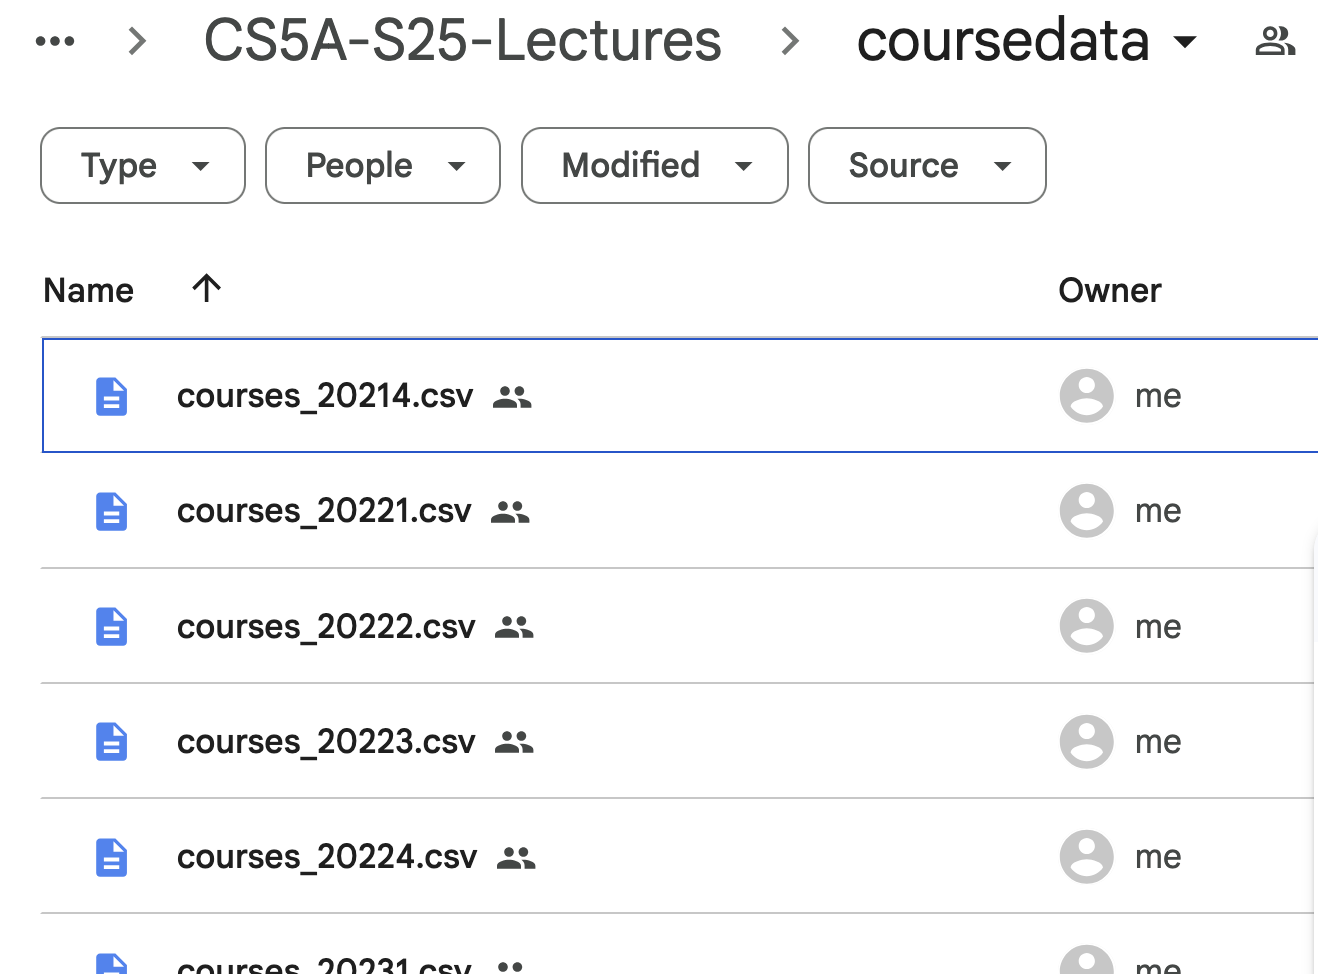





The first four digits are the year, and the final digit is:

* 1 for Winter
* 2 for Spring
* 3 for Summer
* 4 for Fall.

The purpose of this way of representing the data is to allow data from different quarters to be sorted in chronological order.

These files come from this endpoint:

* <https://courses.dokku-00.cs.ucsb.edu/swagger-ui/index.html#/API%20for%20course%20data%20as%20CSV%20downloads>

The data originally comes from this API:

* <https://developer.ucsb.edu/content/academic-curriculums>

(See [this Jupyter Notebook](https://colab.research.google.com/drive/188jTlQ4W8brr41kMA4jCLKJIupA9c7Fj?usp=drive_link) for a further exploration of getting data from APIs, including the UCSB Developer API.

The data here includes three full academic years:
* 2021-2022
* 2022-2023
* 2023-2024

In addition there is partial data for the 2024-2025 school years (Fall and Winter quarters.)



## Building a data set to study

In order to build an interesting data set to study, let's build a single table with the following data:

* Data across the three full academic years
* Data only for CMPSC, PSTAT, MATH, COMM, ECON
  * We are limiting the data to five departments mainly to keep the size manageable.
* Data only for lectures that are not closed

We'll start by building a single table for the quarter `20214` (Fall 2021).  Then we'll see how we can add other data to it.


## Mounting the Data Directory

First, we need to copy the data from the Google Drive folder into the workspace for our notebook.  We need to have run this code in the top cell of our notebook first:

```python
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
```

That puts us through the questions that ask us if we give permission to the notebook to access our Google Drive files.  Once that's done, this command will copy all of the files from a particular Google Drive folder URL into our notebook's workspace:

In [ ]:
!gdown --folder https://drive.google.com/drive/folders/1Dv1GRzYdbxzm_htu3_dAd-CDoKw9A03G?usp=drive_link -O /content/coursedata

Retrieving folder contents
Processing file 1ft9Y2l_xRKNvqHCVfAEcf8E_bOlld9ad courses_20214.csv
Processing file 1JK_DxjmrC7v5m7JBj2D2os_SgF3b2cAT courses_20221.csv
Processing file 1XWWP6nmKr158r9dwf1uIFT97b2Z7Ktdy courses_20222.csv
Processing file 1tjrNg3l3raxHTi5lUECpAwTe2UhjxAsJ courses_20223.csv
Processing file 1b6BBhUuz2P7S14lOiheG6BvvUYe4x4h3 courses_20224.csv
Processing file 1r4YM9-zgluhLCqMpdaMDyscfKm0P3-qG courses_20231.csv
Processing file 1LgCPPUj8g9zF5qhXSaqeKYLP-5Nn9uLE courses_20232.csv
Processing file 1MX3xWDLeURWkqD3yrPcVtMVvI8058I7q courses_20233.csv
Processing file 1aNC1XZxcnemGn3iRSa8mOU0Mbxskfnps courses_20234.csv
Processing file 199ns1V1Hbl5V5IIa7ydDsp22Ipx50bfr courses_20241.csv
Processing file 1edBMNPRqmSlwiIop-2qeyl-JCpmluceT courses_20242.csv
Processing file 1dF5ZXbG2P9bSb2-ikBa9mD7iDd4sFfZw courses_20243.csv
Processing file 19T9Ib50tHQrGyzp2BODpYPM_nO3EiEJG courses_20244.csv
Processing file 1pIREGZM2PuNGfgZdOnEpfMyo4glcIxDE courses_20251.csv
Processing file 1lQlP

Now let's get the data from `courses_20214.csv`

In [ ]:
courses_20214 = Table().read_table("/content/coursedata/courses_20214.csv")
courses_20214

COURSEID,ENROLLED,GES,INSTRUCTOR,MAXENROLL,QUARTER,SECTION,STATUS
ANTH 3 -1,488,"D (L&S), D (ENGR), NWC (L&S), WRT (ENGR), WRT (L&S), NWC ...","SMITH S T, SMITH E K",525,20214,100,nan
ANTH 3 -1,25,"D (L&S), D (ENGR), NWC (L&S), WRT (ENGR), WRT (L&S), NWC ...",BROBERG A A,25,20214,101,nan
ANTH 3 -1,20,"D (L&S), D (ENGR), NWC (L&S), WRT (ENGR), WRT (L&S), NWC ...",NOE S J,25,20214,103,nan
ANTH 3 -1,24,"D (L&S), D (ENGR), NWC (L&S), WRT (ENGR), WRT (L&S), NWC ...",BROBERG A A,25,20214,104,nan
ANTH 3 -1,24,"D (L&S), D (ENGR), NWC (L&S), WRT (ENGR), WRT (L&S), NWC ...",NOE S J,25,20214,105,nan
ANTH 3 -1,24,"D (L&S), D (ENGR), NWC (L&S), WRT (ENGR), WRT (L&S), NWC ...",LUCERO B M,25,20214,106,nan
ANTH 3 -1,23,"D (L&S), D (ENGR), NWC (L&S), WRT (ENGR), WRT (L&S), NWC ...",MITCHELL S T,25,20214,107,nan
ANTH 3 -1,21,"D (L&S), D (ENGR), NWC (L&S), WRT (ENGR), WRT (L&S), NWC ...",LOBIONDO M V,25,20214,108,nan
ANTH 3 -1,26,"D (L&S), D (ENGR), NWC (L&S), WRT (ENGR), WRT (L&S), NWC ...",IOANNIDES M J,25,20214,110,nan
ANTH 3 -1,24,"D (L&S), D (ENGR), NWC (L&S), WRT (ENGR), WRT (L&S), NWC ...",IOANNIDES M J,25,20214,111,nan


Now, our next inclination might be to write code like this:

```python
courses_20221 = Table().read_table("/content/coursedata/courses_20221.csv")
courses_20222 = Table().read_table("/content/coursedata/courses_20222.csv")
courses_20223 = Table().read_table("/content/coursedata/courses_20223.csv")
courses_20224 = Table().read_table("/content/coursedata/courses_20224.csv")
# etc...
```

But let's stop for a minute.   Any time you have variable names that have some kind of pattern like this, it's good to stop and consider the alternatives of a list or a dictionary.

We haven't covered dictionaries yet, so let's use a list instead.  We'll start by making a list of all of the quarters we want data for:

In [ ]:
quarters = ["20214", "20221", "20222", "20223", "20224", "20231", "20232", "20233", "20234", "20241", "20242", "20243"]
quarters

['20214',
 '20221',
 '20222',
 '20223',
 '20224',
 '20231',
 '20232',
 '20233',
 '20234',
 '20241',
 '20242',
 '20243']

Now we can use a loop with something called the *accumulator pattern*.LookupError

The accumulator pattern is covered in [Section 9.2.1](https://inferentialthinking.com/chapters/09/2/Iteration.html#augmenting-arrays) of your textbook as a way to "augment arrays".  I encourage you to read that shortly after this lecture so that you can try to find the parallels.

Here we are using it to "build a list" which is not exactly the same but similar.   We'll return to this *accumulator pattern* idea frequently throughout the rest of the course.

The basic idea is that we start with an empty list like this one:

```python
list_of_tables = []
```

Then, we add things to this list one at a time using `.append(...)`, which is a Python method that will change the list by adding a new element to it.

### Short digression: using `.append(...)` with lists

First, here's a reminder of how adding this to a list with append works:

In [ ]:
schools = [] # Start with empty list
schools

[]

In [ ]:
schools.append("UCSB")
schools

['UCSB']

In [ ]:
schools.append("UCLA")
schools

['UCSB', 'UCLA']

Bascially every time you call `append` a new element is added to a list.

## The accumulator pattern

We can build up a new list this way using a loop.

For example, suppose we have a list of quarters:

In [ ]:
quarters

['20214',
 '20221',
 '20222',
 '20223',
 '20224',
 '20231',
 '20232',
 '20233',
 '20234',
 '20241',
 '20242',
 '20243']

Now we can use a loop with something called the *accumulator pattern* to build up a list of filenames.

* We start with an empty list
* We then use a loop over our quarters
* Inside the loop, for each quarter, we form a filename and append it to the list
* When the list is finished, we have a list of filenames


In [ ]:
filenames = []
for quarter in quarters:
  filename = f"/content/coursedata/courses_{quarter}.csv"
  filenames.append(filename)
filenames

['/content/coursedata/courses_20214.csv',
 '/content/coursedata/courses_20221.csv',
 '/content/coursedata/courses_20222.csv',
 '/content/coursedata/courses_20223.csv',
 '/content/coursedata/courses_20224.csv',
 '/content/coursedata/courses_20231.csv',
 '/content/coursedata/courses_20232.csv',
 '/content/coursedata/courses_20233.csv',
 '/content/coursedata/courses_20234.csv',
 '/content/coursedata/courses_20241.csv',
 '/content/coursedata/courses_20242.csv',
 '/content/coursedata/courses_20243.csv']

We can take this a step further: instead of just making a list of filenames, we can open each filename as a table, pull our just the the data we want, and add that data to a list of tables.

In [ ]:
tables = []
for quarter in quarters:
  filename = f"/content/coursedata/courses_{quarter}.csv"
  courseTable = Table.read_table(filename)
  courses = courseTable.with_columns(
    "dept", courseTable.apply(courseIdToDept, 0),
    "courseNum", courseTable.apply(courseIdToCourseNum, 0),
    "suffix", courseTable.apply(courseIdToSuffix, 0),
    "isLecture", courseTable.apply(isLecture, "SECTION"),
    "level", courseTable.apply(courseIdToLevel, "COURSEID")
  )
  courses = courses.where("isLecture", are.equal_to(True)) \
    .where("dept", are.contained_in(["CMPSC", "PSTAT", "MATH", "COMM", "ECON"])) \
    .where("STATUS", are.not_equal_to("Closed"))
  tables.append(courses)

len(tables)

12

Now we have a variable `tables` with a list of 12 tables.  

We can see that:
* `tables[0]` is a table of the courses from `20214` (i.e. Fall 2021)
* `tables[11]` is a table of the courses fron `20243` (i.e. Summer 2024)

In [ ]:
tables[0]

COURSEID,ENROLLED,GES,INSTRUCTOR,MAXENROLL,QUARTER,SECTION,STATUS,dept,courseNum,suffix,isLecture,level
CMPSC 5A -1,78,nan,SOLIS S W,90,20214,100,nan,CMPSC,5A,1,True,L
CMPSC 5B -1,22,nan,SOLIS S W,80,20214,100,nan,CMPSC,5B,1,True,L
CMPSC 9 -1,130,nan,WANG R K,150,20214,100,nan,CMPSC,9,1,True,L
CMPSC 24A -1,2,nan,WANG R K,0,20214,100,nan,CMPSC,24A,1,True,L
CMPSC 32 -1,89,nan,EMRE M,90,20214,100,nan,CMPSC,32,1,True,L
CMPSC 40 -1,73,nan,MIRZA D,70,20214,100,nan,CMPSC,40,1,True,L
CMPSC 64 -1,85,nan,SHERWOOD T P,90,20214,100,nan,CMPSC,64,1,True,L
CMPSC 99 -1,0,nan,nan,5,20214,100,nan,CMPSC,99,1,True,L
CMPSC 99 -2,2,nan,LOKSHTANOV D,5,20214,200,nan,CMPSC,99,2,True,L
CMPSC 99 -3,0,nan,KOZERAWSKI J,5,20214,300,nan,CMPSC,99,3,True,L


In [ ]:
tables[11]

COURSEID,ENROLLED,GES,INSTRUCTOR,MAXENROLL,QUARTER,SECTION,STATUS,dept,courseNum,suffix,isLecture,level
CMPSC 9 -1,57,nan,WANG R K,75,20243,100,nan,CMPSC,9,1,True,L
CMPSC 9 -2,30,nan,SISCO Z D,40,20243,200,nan,CMPSC,9,2,True,L
CMPSC 16 -1,24,nan,DOWNING M E,75,20243,100,nan,CMPSC,16,1,True,L
CMPSC 24 -1,15,nan,MAJEDI M,35,20243,100,nan,CMPSC,24,1,True,L
CMPSC 40 -1,12,nan,SURIANARAYANA,40,20243,100,nan,CMPSC,40,1,True,L
CMPSC 99 -1,0,nan,nan,5,20243,100,nan,CMPSC,99,1,True,L
CMPSC 111 -1,16,nan,GIBOU F G,70,20243,100,nan,CMPSC,111,1,True,U
CMPSC 192 -1,0,nan,nan,5,20243,100,nan,CMPSC,192,1,True,U
CMPSC 192 -2,1,nan,YAN X,5,20243,200,nan,CMPSC,192,2,True,U
CMPSC 193 -1,0,nan,nan,90,20243,100,nan,CMPSC,193,1,True,U


Our next step is to combine all of these into one table.  Let's ask Gemini how to do that.

In [ ]:
# prompt: Write a function that takes a list of datascience Tables as a parameter, each of which has the same columns, and returns a new table that has all of the contents of the individual tables combined into one.

def combine_tables(list_of_tables):
    """
    Combines a list of datascience Tables into a single Table.

    Args:
        list_of_tables: A list of datascience Tables, each with the same columns.

    Returns:
        A new datascience Table containing all the rows from the input tables.
        Returns an empty table if the input list is empty or None.
    """
    if not list_of_tables:
        return Table()  # Return an empty table for an empty or None input

    combined_table = list_of_tables[0].copy()  # Start with a copy of the first table
    for table in list_of_tables[1:]:
        combined_table = combined_table.append(table)
    return combined_table


We can see that this function uses the accumulator pattern. Instead of starting with an empty table, it starts with a copy of the first table.  It then uses the `append` method of `datascience.table.Table` to add all of the rows of the other tables to the result.

It also has this code to give us an empty in case we give it an empty list as input:
```python
    if not list_of_tables:
        return Table()  # Return an empty table for an empty or None input
```

Let's try that function now on our list of tables:

In [ ]:
courses = combine_tables(tables)
courses

COURSEID,ENROLLED,GES,INSTRUCTOR,MAXENROLL,QUARTER,SECTION,STATUS,dept,courseNum,suffix,isLecture,level
CMPSC 5A -1,78,nan,SOLIS S W,90,20214,100,nan,CMPSC,5A,1,True,L
CMPSC 5B -1,22,nan,SOLIS S W,80,20214,100,nan,CMPSC,5B,1,True,L
CMPSC 9 -1,130,nan,WANG R K,150,20214,100,nan,CMPSC,9,1,True,L
CMPSC 24A -1,2,nan,WANG R K,0,20214,100,nan,CMPSC,24A,1,True,L
CMPSC 32 -1,89,nan,EMRE M,90,20214,100,nan,CMPSC,32,1,True,L
CMPSC 40 -1,73,nan,MIRZA D,70,20214,100,nan,CMPSC,40,1,True,L
CMPSC 64 -1,85,nan,SHERWOOD T P,90,20214,100,nan,CMPSC,64,1,True,L
CMPSC 99 -1,0,nan,nan,5,20214,100,nan,CMPSC,99,1,True,L
CMPSC 99 -2,2,nan,LOKSHTANOV D,5,20214,200,nan,CMPSC,99,2,True,L
CMPSC 99 -3,0,nan,KOZERAWSKI J,5,20214,300,nan,CMPSC,99,3,True,L


Now we can try things like this:

In [ ]:
conrads_courses = courses.where("INSTRUCTOR", are.equal_to("CONRAD P T"))
conrads_courses

COURSEID,ENROLLED,GES,INSTRUCTOR,MAXENROLL,QUARTER,SECTION,STATUS,dept,courseNum,suffix,isLecture,level
CMPSC 100 -1,19,nan,CONRAD P T,25,20214,100,nan,CMPSC,100,1,True,U
CMPSC 596 -2,1,nan,CONRAD P T,20,20221,200,nan,CMPSC,596,2,True,G
CMPSC 156 -1,71,nan,CONRAD P T,72,20222,100,nan,CMPSC,156,1,True,U
CMPSC 190D -1,9,nan,CONRAD P T,2,20222,100,nan,CMPSC,190D,1,True,U
CMPSC 192 -2,1,nan,CONRAD P T,20,20222,200,nan,CMPSC,192,2,True,U
CMPSC 596 -3,1,nan,CONRAD P T,30,20222,300,nan,CMPSC,596,3,True,G
CMPSC 16 -1,156,nan,CONRAD P T,150,20231,100,nan,CMPSC,16,1,True,L
CMPSC 192 -2,1,nan,CONRAD P T,10,20231,200,nan,CMPSC,192,2,True,U
CMPSC 596 -38,1,nan,CONRAD P T,20,20231,3800,nan,CMPSC,596,38,True,G
CMPSC 596 -37,1,nan,CONRAD P T,30,20232,3700,nan,CMPSC,596,37,True,G


Let's try a simple pivot table to see the number of Upper Division, Lower Divison, and Grad classes, by department:

In [ ]:
courses.pivot("level", "dept", "ENROLLED", sum)

dept,G,L,U
CMPSC,3607,4900,7874
COMM,806,6795,14059
ECON,2192,19066,25466
MATH,2357,32807,10461
PSTAT,2599,8720,20568


# Review of Bar Graphs

If we want a simple bar chart of all Lower Division, Upper Division and Grad classes, we can do a simple bar chart by level:

In [ ]:
courses.group("level")

level,count
G,2053
L,747
U,2305


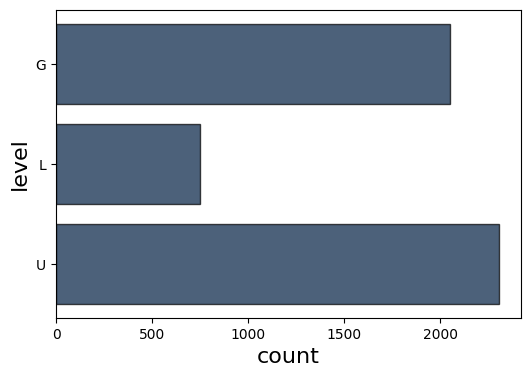

In [ ]:
courses.group("level").barh("level")

## Short Digression: Vertical Bar Charts
Unforunately, the Berkeley Data 8 `datascience` module doesn't do vertical bar graphs very well.  

In principle, you just use `bar` instead of `barh`.  But you'll notice that it isn't included in the documentation or the textbook; probably because it's broken.

You can try it, but you get weird results (duplicated labels on the x axis).  Notice the weird multiple "G", "L" and "U" labels in the chart shown below.

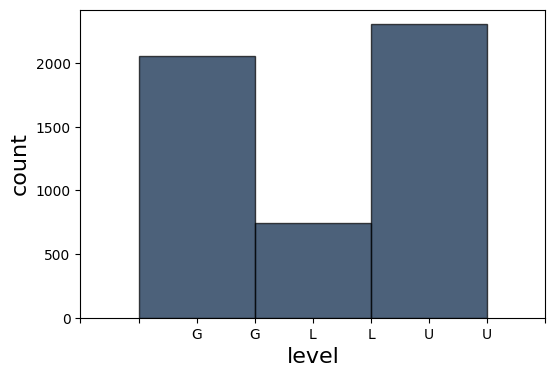

In [ ]:
courses.group("level").bar("level")

The only way I've found to overcome this is to directly use the library that `datascience` uses "under the hood", which is called `matplotlib`.  This library is the one that is used directly by more advanced data science professionals.  

*We are not requiring you to become familiar with `matplotlib` in this course*.

But just for reference, here's how that looks.

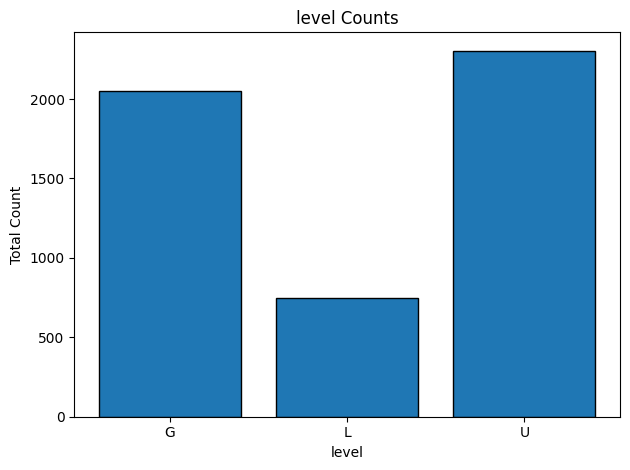

In [ ]:
import matplotlib.pyplot as plt
grouped = data.group("level", sum)
levels = grouped.column("level")
counts = grouped.column("count sum")

# Plot using matplotlib for full control
plt.bar(levels, counts)
plt.xlabel("level")
plt.ylabel("Total Count")
plt.title("level Counts")
# plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Multiple Bar Graphs (Section 7.3)

Let's return to the original horizontal bar graph


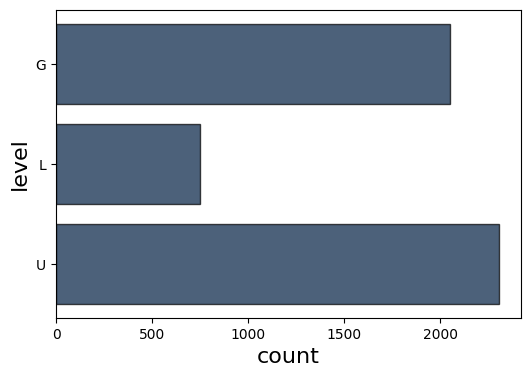

In [ ]:
courses.group("level").barh("level")


Suppose that instead of one bar per level, we want multiple bars: one for each of our departments (`CMPSC`, `PSTAT`, `MATH`, `COMM` and `ECON`).

We start with a pivot, like this.  A simple `pivot` that doesn't specify any column or collection function just returns a simple count of the number of rows that have this combination of categorical values:


In [ ]:
courses.pivot("dept","level")

level,CMPSC,COMM,ECON,MATH,PSTAT
G,508,280,359,514,392
L,82,148,167,278,72
U,553,478,427,396,451


We can then apply `barh` to that to get a bar chart with multiple bars, like this:

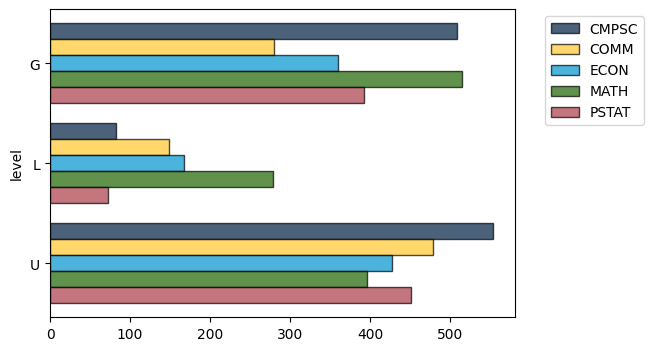

In [ ]:
courses.pivot("dept","level").barh('level')

The number of grad and upper division courses for `CMPSC` seems really high, but as it turns out, many of these are independent study (research) courses with a very small number of students.  If we repeat this analysis using a sum of enrollment, we get a different result:

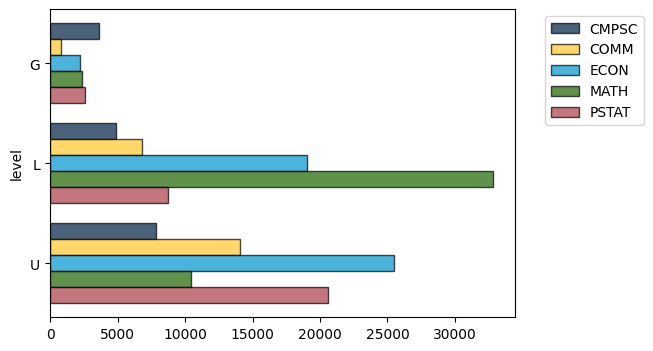

In [ ]:
courses.pivot("dept","level", "ENROLLED", sum).barh('level')

If we want to group by department first, we just invert the order:

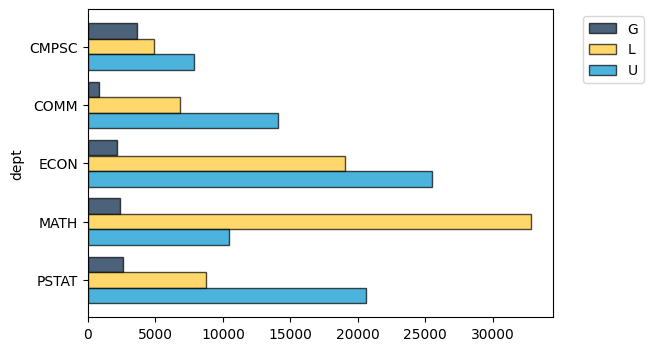

In [ ]:
courses.pivot("level","dept", "ENROLLED", sum).barh('dept')

As you can see, the mix of lower div, upper div, and grad courses varies considerably from department to department!

# Lines graphs over time

Now let's consider how we might show total enrollment in undergraduate courses over time, for the five departments.

We'll first select out only the courses that are not grad courses

In [ ]:
undergrad = courses.where("level", are.not_equal_to("G"))

print(f"Total courses = {courses.num_rows}")
print(f"Total undergrad courses = {undergrad.num_rows}")


Total courses = 5105
Total undergrad courses = 3052


In [ ]:
enrollment = undergrad.pivot("dept","QUARTER","ENROLLED", sum).sort("QUARTER")
enrollment

QUARTER,CMPSC,COMM,ECON,MATH,PSTAT
20214,1314,1171,4675,4646,2134
20221,427,2360,4587,4722,2683
20222,1017,2276,4602,3524,2794
20223,221,802,805,1296,1104
20224,1215,2269,4461,4869,3007
20231,1596,2618,4738,5004,3234
20232,1441,707,4455,3626,2909
20233,248,843,959,1060,898
20234,1326,1979,4542,4922,3039
20241,1722,2116,4873,4956,3226


We can try producing a bar chart for this.  But as you can see it's a bit cluttered and hard to read.

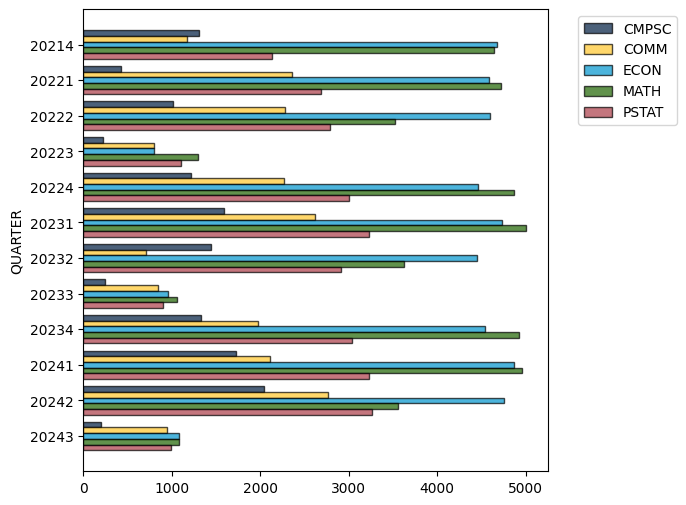

In [ ]:
enrollment.barh("QUARTER")

Let's try a line graph instead.  This is how we put "QUARTER" on the x axis, and make a line for every other column in the table.

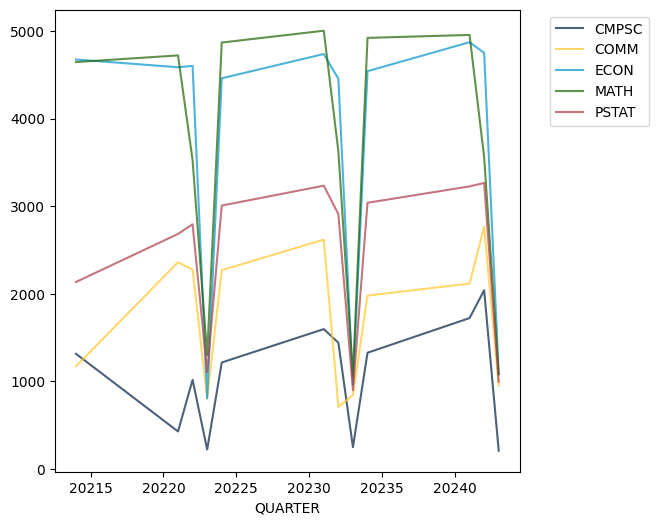

In [ ]:
enrollment.plot("QUARTER")

Clearly, the summer quarters are making this graph a bit hard to interpret. There are two approaches we could try, so let's try them both:
* Combine each entire academic year into one number (Fall, Winter, Spring, Summer) for each year
* Omit summer from this graph, and plot it as a separate graph

Here's the version where we omit summer.  We'll add a function to determine if a quarter is a summer quarter.  We'll convert the quarter from a number to a string, and then look at the last character:

In [ ]:
def isSummer(quarter):
  quarterStr = str(quarter)
  return quarterStr[-1] == "3"

undergrad1 = undergrad.with_column("isSummer", undergrad.apply(isSummer, "QUARTER"))
undergrad1

regularQuarterCourses = undergrad1.where("isSummer", are.equal_to(False))
summerCourses = undergrad1.where("isSummer", are.equal_to(True))

In [ ]:
enrollmentRegularQuarterCourses = regularQuarterCourses.pivot("dept","QUARTER","ENROLLED", sum).sort("QUARTER")
enrollmentRegularQuarterCourses

QUARTER,CMPSC,COMM,ECON,MATH,PSTAT
20214,1314,1171,4675,4646,2134
20221,427,2360,4587,4722,2683
20222,1017,2276,4602,3524,2794
20224,1215,2269,4461,4869,3007
20231,1596,2618,4738,5004,3234
20232,1441,707,4455,3626,2909
20234,1326,1979,4542,4922,3039
20241,1722,2116,4873,4956,3226
20242,2040,2765,4751,3562,3265


In [ ]:
enrollmentSummerCourses = summerCourses.pivot("dept","QUARTER","ENROLLED", sum).sort("QUARTER")
enrollmentSummerCourses

QUARTER,CMPSC,COMM,ECON,MATH,PSTAT
20223,221,802,805,1296,1104
20233,248,843,959,1060,898
20243,207,948,1084,1081,995


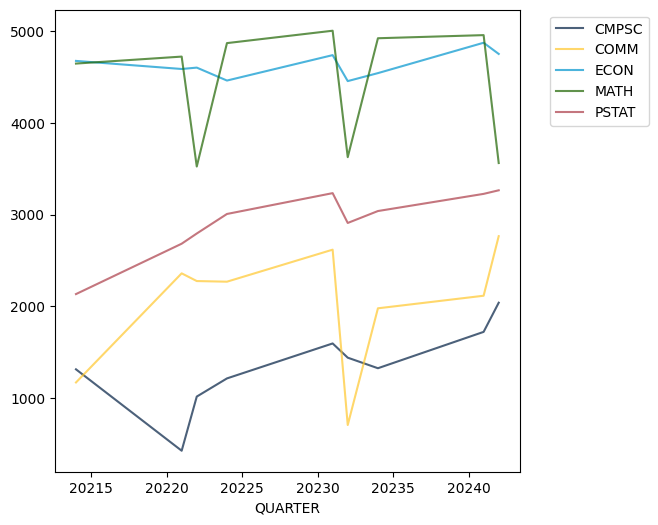

In [ ]:
enrollmentRegularQuarterCourses.plot("QUARTER")

This is a little misleading, of course, because it's using the quarter number as an integer on the x axis, when it's really more of a category.  

That is:
* The distance from 20244 to 20251 *in reality* is really the same as the distance from 20251 to 20252 (it's just one quarter later)
* But on this plot, treating these weird "quarter numbers" as actual numbers, that distance is distorted.  The distance from Fall Quarter to Winter Quarter is stretched way out, while Winter and Spring quarters are next to each other.

In addition, the plot is plotting units of 5, when in fact, there is no quarter called 20224 or 20230; those values literally don't exist.

Let's try asking the Gemini AI if it can help out here.  

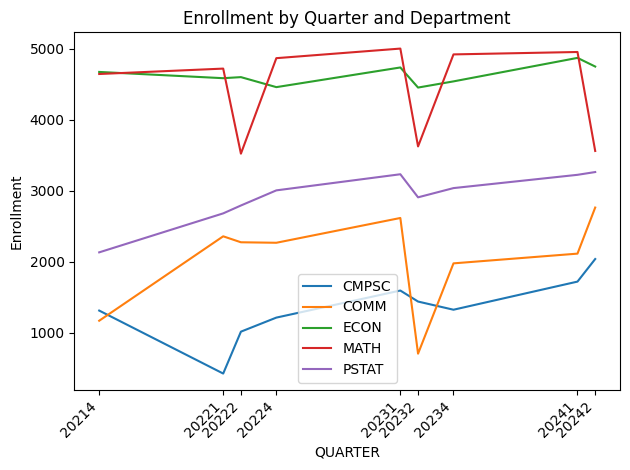

In [ ]:
# prompt: Generate the plot for enrollmentRegularQuarterCourses.plot("QUARTER") but label every value for QUARTER, not just every fifth value

import matplotlib.pyplot as plt

# Assuming enrollmentRegularQuarterCourses is already defined as in the provided code

quarters = enrollmentRegularQuarterCourses.column("QUARTER")
for dept in enrollmentRegularQuarterCourses.labels[1:]:
    enrollments = enrollmentRegularQuarterCourses.column(dept)
    plt.plot(quarters, enrollments, label=dept)

plt.xlabel("QUARTER")
plt.ylabel("Enrollment")
plt.title("Enrollment by Quarter and Department")
plt.xticks(quarters, rotation=45, ha="right")  # Set x-axis ticks to all quarters
plt.legend()
plt.tight_layout()
plt.show()


This is a little better.   We are now seeing labels on each of the specific quarters, which makes it a bit easier to interpret the data.

One of the things we see is that *something* strange appears to have happened in 20221 (Winter 2022) where the total enrollment in `CMPSC` went way down compared to previous quarters.  

That appears to have been some kind of anomaly.  When we see something like this we may want to check whether this is because something really happened, then, or if this is just an error in our data.

We see a similar strange drop for `COMM` in Spring of 2023 (`20233`).

We also see a repeating pattern for `MATH` that undergrad enrollment seems to go way down every Spring, and then go back up again.  It might be interesting to collect more data and see whether this is in fact a repeating pattern, or again, just some error in our data collection.

### Summer Enrollments

We can now plot the summer enrollments separately

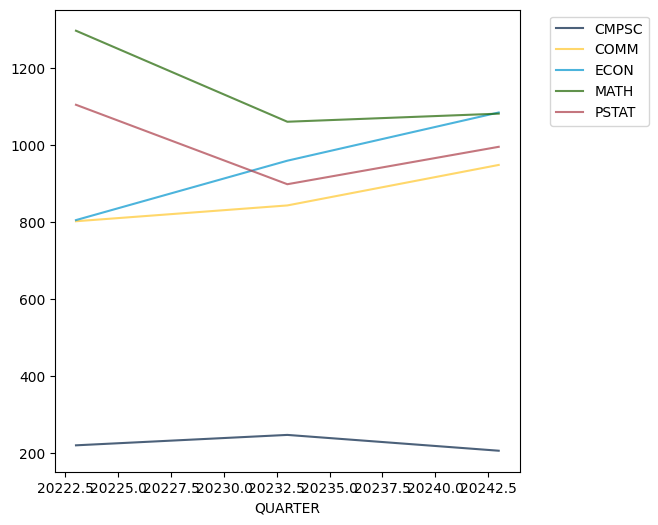

In [ ]:
enrollmentSummerCourses.plot("QUARTER")

Again, the x axis is weird.   Let's try the Gemini trick again

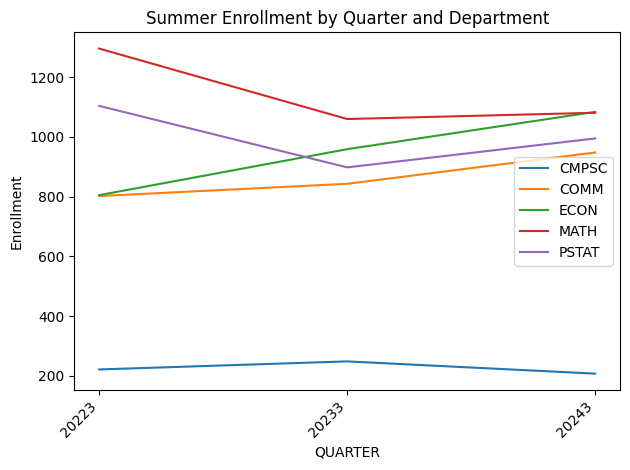

In [ ]:
# prompt: # prompt: Generate the plot for enrollmentSummerCourses.plot("QUARTER") but label every value for QUARTER

import matplotlib.pyplot as plt
# Assuming enrollmentSummerCourses is already defined as in the provided code

quarters = enrollmentSummerCourses.column("QUARTER")
for dept in enrollmentSummerCourses.labels[1:]:
    enrollments = enrollmentSummerCourses.column(dept)
    plt.plot(quarters, enrollments, label=dept)

plt.xlabel("QUARTER")
plt.ylabel("Enrollment")
plt.title("Summer Enrollment by Quarter and Department")
plt.xticks(quarters, rotation=45, ha="right")  # Set x-axis ticks to all quarters
plt.legend()
plt.tight_layout()
plt.show()


Now that's a nice clean graph.   With only three data points, it's hard to make any solid conclusions, but we can at least compare the sizes of the enrollments, as well as see the trend over time.

## Summarizing by academic year

Let's add academic year to our graph.   We'll use the year of the fall quarter to summarize the year, i.e. `20214`, `20221`, `20222` and `20223` will all belong to academic year `2021`.

Note that I tried using Gemini AI to write this function.  It originally had this code at the end:

```python
    if quarter == 4:  # Fall quarter belongs to the current year
      return year
    else:  # Other quarters belong to the previous year
      return year
```

That was incorrect, so I had to change it to this:

```python
    if quarter == 4:  # Fall quarter belongs to the current year
      return year
    else:  # Other quarters belong to the previous year
      return year - 1
```

It's important to actually read the code that AI generates and understand how it works!

In [ ]:
# prompt: Write a python function that will convert quarters as integers
# in the pattern yyyyq where q is 1 for winter, 2 for spring, 3 for summer and 4 for fall
# into a four digit academc year as an integer.
# Please treat fall, winter, spring and summer as one academic year.

def quarter_to_academic_year(quarter_int):
    """Converts a quarter integer (yyyyq) to a four-digit academic year.

    Args:
        quarter_int: An integer representing the quarter in the format yyyyq,
                     where q is 1 (winter), 2 (spring), 3 (summer), or 4 (fall).

    Returns:
        An integer representing the four-digit academic year.
        Returns None if the input is invalid.
    """
    quarter_str = str(quarter_int)
    if len(quarter_str) != 5 or not quarter_str[:4].isdigit() or not quarter_str[4].isdigit():
        return None  # Invalid input format

    year = int(quarter_str[:4])
    quarter = int(quarter_str[4])

    if quarter == 4:  # Fall quarter belongs to the current year
      return year
    else:  # Other quarters belong to the previous year
      return year-1



Let's apply this function to the `QUARTER` column in our table and add a year for academic year

In [ ]:
undergrad_with_ay = undergrad.with_column("AY", undergrad.apply(quarter_to_academic_year, "QUARTER"))
undergrad_with_ay

COURSEID,ENROLLED,GES,INSTRUCTOR,MAXENROLL,QUARTER,SECTION,STATUS,dept,courseNum,suffix,isLecture,level,AY
CMPSC 5A -1,78,nan,SOLIS S W,90,20214,100,nan,CMPSC,5A,1,True,L,2021
CMPSC 5B -1,22,nan,SOLIS S W,80,20214,100,nan,CMPSC,5B,1,True,L,2021
CMPSC 9 -1,130,nan,WANG R K,150,20214,100,nan,CMPSC,9,1,True,L,2021
CMPSC 24A -1,2,nan,WANG R K,0,20214,100,nan,CMPSC,24A,1,True,L,2021
CMPSC 32 -1,89,nan,EMRE M,90,20214,100,nan,CMPSC,32,1,True,L,2021
CMPSC 40 -1,73,nan,MIRZA D,70,20214,100,nan,CMPSC,40,1,True,L,2021
CMPSC 64 -1,85,nan,SHERWOOD T P,90,20214,100,nan,CMPSC,64,1,True,L,2021
CMPSC 99 -1,0,nan,nan,5,20214,100,nan,CMPSC,99,1,True,L,2021
CMPSC 99 -2,2,nan,LOKSHTANOV D,5,20214,200,nan,CMPSC,99,2,True,L,2021
CMPSC 99 -3,0,nan,KOZERAWSKI J,5,20214,300,nan,CMPSC,99,3,True,L,2021


Let's use the technique of random sampling to check whether the function appears to be working properly.

As it turns out there's a simpler way to sample from a table than what we've used in the past:

In [ ]:
random_sample = undergrad_with_ay.sample(10)
random_sample

COURSEID,ENROLLED,GES,INSTRUCTOR,MAXENROLL,QUARTER,SECTION,STATUS,dept,courseNum,suffix,isLecture,level,AY
ECON 9 -1,85,"D (L&S), D (ENGR)",BENELLI C A,100,20222,100,nan,ECON,9,1,True,L,2021
COMM 199RA-15,1,nan,AFIFI W A,50,20233,1500,nan,COMM,199RA,15,True,U,2022
MATH 147A -1,30,nan,CHO G,50,20223,100,nan,MATH,147A,1,True,U,2021
MATH 111C -1,47,nan,SCHLEY N B,60,20222,100,nan,MATH,111C,1,True,U,2021
COMM 197 -1,6,nan,KIM YOUNG JI,50,20233,100,nan,COMM,197,1,True,U,2022
COMM 199RA-16,2,nan,RICE R E,60,20221,1600,nan,COMM,199RA,16,True,U,2021
MATH 124A -1,21,nan,CHO G,50,20223,100,nan,MATH,124A,1,True,U,2021
PSTAT 199 -4,2,nan,DETERING N,10,20214,400,nan,PSTAT,199,4,True,U,2021
CMPSC 196 -2,6,nan,GUPTA A,10,20231,200,nan,CMPSC,196,2,True,U,2022
COMM 199RA-9,5,nan,SALEEM M,60,20234,900,nan,COMM,199RA,9,True,U,2023


This appears to be working!  Now let's try creating an analysis of enrollment by academic year for the five departments

In [ ]:
by_ay = undergrad_with_ay.pivot("dept","AY","ENROLLED", sum)
by_ay

AY,CMPSC,COMM,ECON,MATH,PSTAT
2021,2979,6609,14669,14188,8715
2022,4500,6437,14613,14559,10048
2023,5295,7808,15250,14521,10525


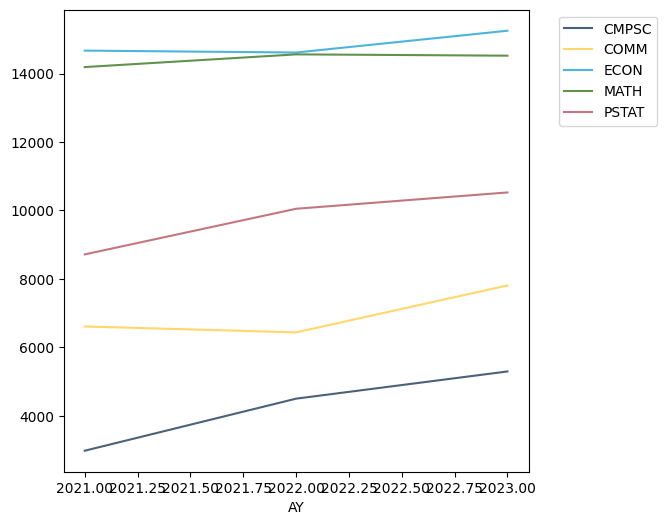

In [ ]:
by_ay.plot("AY")

Ok, this plot is clean except for that awful looking X axis.  

There's also something misleading: note that the y axis *does not start at zero*.  This can cause the differences between/among departments to be distorted.  Let's fix both issues.

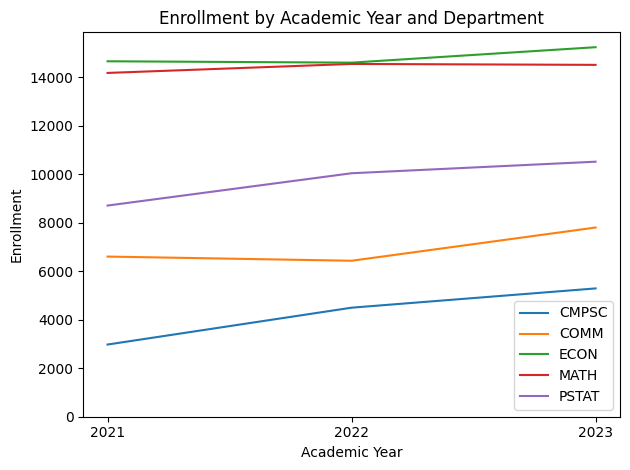

In [ ]:
# prompt: The plot by_ay.plot("AY") has the data I want, but I prefer the y axis to start at zero, and for the x axis to only be labelled with points that actually occur in the data.

# Assuming by_ay is already defined as in the provided code

import matplotlib.pyplot as plt

quarters = by_ay.column("AY")
for dept in by_ay.labels[1:]:
    enrollments = by_ay.column(dept)
    plt.plot(quarters, enrollments, label=dept)

plt.xlabel("Academic Year")
plt.ylabel("Enrollment")
plt.title("Enrollment by Academic Year and Department")
plt.xticks(quarters)  # Set x-axis ticks to all academic years
plt.ylim(bottom=0) # set the y axis to start at zero
plt.legend()
plt.tight_layout()
plt.show()
